1.importing mnist
2.splitting x and y train & test
3.28*28=784 size of mnist so reshaping it
4.output dim so compressed as 16 from input dim 28
5.encoding layer and decoding layer
6.encoder layer will take 28 size and compress to 16
7.passing output of encoder to decoder as input
8.build model and compiling, fitting (unsupervised model), plotting accuracy-loss
9.unsupervised model so no ytrain or ytest only xtrain & xtest


In [ ]:
#loading
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images,test_labels)=mnist.load_data()
#reshaping
import numpy as np
train_images=np.reshape(train_images,(-1,784))
test_images=np.reshape(test_images,(-1,784))
#normalizing
train_images=train_images.astype("float32")/255
test_images=test_images.astype("float32")/255

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
print(train_images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [ ]:
from tensorflow.keras import Model,Input
from tensorflow.keras.layers import Dense

input_dim=28*28
latent_vec_dim=16

input_layer=Input(shape=(input_dim,))

enc_layer_1=Dense(latent_vec_dim,activation="tanh")(input_layer)
encoder=enc_layer_1

dec_layer_1=Dense(input_dim,activation="sigmoid")(encoder)
decoder=dec_layer_1

autoencoder=Model(input_layer,decoder)

latent_model=Model(input_layer,encoder)

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 784)               13328     
                                                                 
Total params: 25,888
Trainable params: 25,888
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(loss="binary_crossentropy",optimizer="adam")

In [ ]:
history=autoencoder.fit(train_images,train_images,epochs=5,validation_data=(test_images,test_images))

Epoch 1/5
1875/1875 [==============================] - 13s 3ms/step - loss: 0.2831 - val_loss: 0.2633
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2632 - val_loss: 0.2629
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2630 - val_loss: 0.2626
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2592 - val_loss: 0.2488
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2399 - val_loss: 0.2317


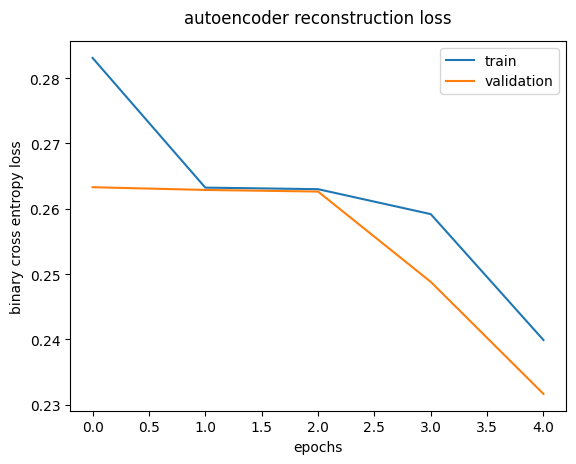

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="validation")
plt.ylabel("binary cross entropy loss")
plt.xlabel("epochs")
plt.title("autoencoder reconstruction loss",pad=13)
plt.legend(loc="upper right")

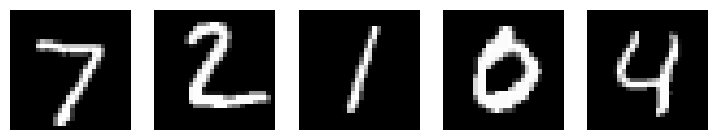

In [ ]:
n=5
plt.figure(figsize=(9,2))
for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.imshow(test_images[i].reshape(28,28),cmap="gray")
  ax.axis("off")

plt.show()

313/313 [==============================] - 0s 1ms/step


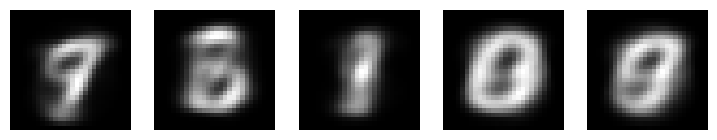

In [ ]:
reconstructed_images=autoencoder.predict(test_images)
n=5
plt.figure(figsize=(9,2))
for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.imshow(reconstructed_images[i].reshape(28,28),cmap="gray")
  ax.axis("off")

plt.show()

# DEEP ENCODER

In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense

input_dim=28*28
latent_vec_dim=16

input_layer=Input(shape=(input_dim,))

#1st build encoder
enc_layer_1=Dense(500,activation="sigmoid")(input_layer)
enc_layer_2=Dense(500,activation="sigmoid")(enc_layer_1)
enc_layer_3=Dense(500,activation="sigmoid")(enc_layer_2)
enc_layer_4=Dense(latent_vec_dim,activation="tanh")(enc_layer_3)
encoder=enc_layer_4
#decoder
dec_layer_1=Dense(500,activation="sigmoid")(encoder)
dec_layer_2=Dense(500,activation="sigmoid")(dec_layer_1)
dec_layer_3=Dense(500,activation="sigmoid")(dec_layer_2)
dec_layer_4=Dense(input_dim,activation="tanh")(dec_layer_3)
decoder=dec_layer_4

autoencoder=Model(input_layer,decoder)

autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 500)               392500    
                                                                 
 dense_3 (Dense)             (None, 500)               250500    
                                                                 
 dense_4 (Dense)             (None, 500)               250500    
                                                                 
 dense_5 (Dense)             (None, 16)                8016      
                                                                 
 dense_6 (Dense)             (None, 500)               8500      
                                                                 
 dense_7 (Dense)             (None, 500)               2505

In [ ]:
autoencoder.compile(loss="binary_crossentropy",optimizer="adam")

In [ ]:
history=autoencoder.fit(train_images,train_images,epochs=5,validation_data=(test_images,test_images))

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.8652 - val_loss: 0.7548
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7504 - val_loss: 0.7555
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7299 - val_loss: 0.6927
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6639 - val_loss: 0.6036
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5875 - val_loss: 0.5840


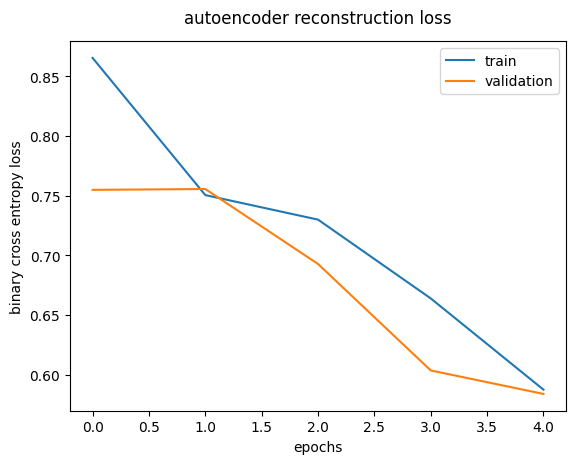

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="validation")
plt.ylabel("binary cross entropy loss")
plt.xlabel("epochs")
plt.title("autoencoder reconstruction loss",pad=13)
plt.legend(loc="upper right")

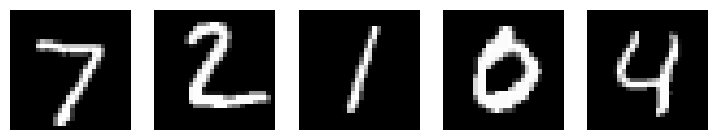

In [ ]:
n=5
plt.figure(figsize=(9,2))
for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.imshow(test_images[i].reshape(28,28),cmap="gray")
  ax.axis("off")

plt.show()

313/313 [==============================] - 1s 2ms/step


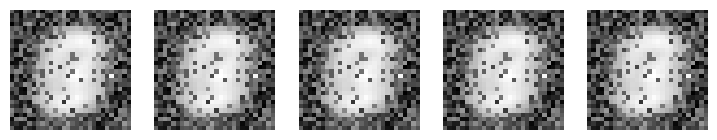

In [ ]:
reconstructed_images=autoencoder.predict(test_images)
n=5
plt.figure(figsize=(9,2))
for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.imshow(reconstructed_images[i].reshape(28,28),cmap="gray")
  ax.axis("off")

plt.show()

# CNN ENCODER

In [ ]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
input_img = Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
# at this point the representation is (7, 7, 32)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
# this model maps an input to its reconstruction
autoencoder = Model(input_img ,decoded)
autoencoder.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 7, 7, 32)          9248

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
epochs=10
history = autoencoder.fit(train_images, train_images, epochs=epochs, batch_size=256,shuffle=True, validation_data=(test_images, test_images))

Epoch 1/10
235/235 [==============================] - 12s 13ms/step - loss: 0.1533 - val_loss: 0.0824
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0793 - val_loss: 0.0755
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0748 - val_loss: 0.0727
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0727 - val_loss: 0.0714
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0714 - val_loss: 0.0702
Epoch 6/10
235/235 [==============================] - 2s 11ms/step - loss: 0.0705 - val_loss: 0.0695
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0698 - val_loss: 0.0689
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0693 - val_loss: 0.0685
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0689 - val_loss: 0.0682
Epoch 10/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0685 - val_lo

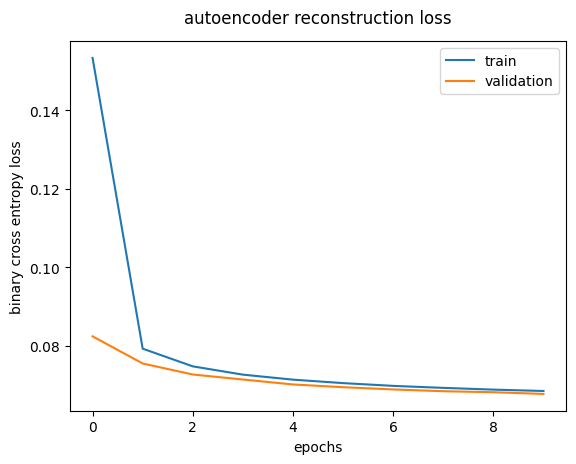

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="validation")
plt.ylabel("binary cross entropy loss")
plt.xlabel("epochs")
plt.title("autoencoder reconstruction loss",pad=13)
plt.legend(loc="upper right")

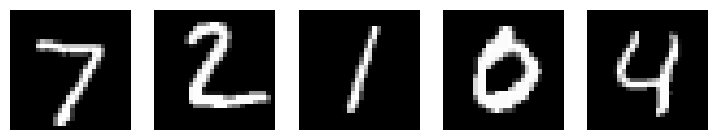

In [ ]:
n=5
plt.figure(figsize=(9,2))
for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.imshow(test_images[i].reshape(28,28),cmap="gray")
  ax.axis("off")

plt.show()

313/313 [==============================] - 1s 2ms/step


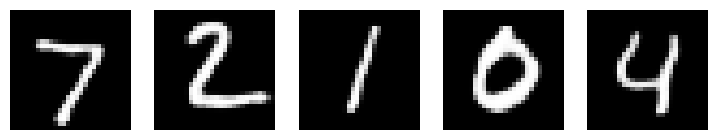

In [ ]:
reconstructed_images=autoencoder.predict(test_images)
n=5
plt.figure(figsize=(9,2))
for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.imshow(reconstructed_images[i].reshape(28,28),cmap="gray")
  ax.axis("off")

plt.show()

# STACKED ENCODER

In [ ]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

input_dim = 784  # Input dimension for MNIST (28x28)

# Define the encoder architecture for the first layer
input_layer = Input(shape=(input_dim,))
encoded = Dense(256, activation='relu')(input_layer)
encoded1 = Dense(128, activation='relu')(encoded)

# Define the decoder architecture for the first layer
decoded = Dense(256, activation='relu')(encoded1)
decoded1 = Dense(input_dim, activation='sigmoid')(decoded)

# Create the autoencoder model for the first layer
autoencoder_1 = Model(input_layer, decoded1)



In [ ]:
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

In [ ]:
autoencoder_1.compile(optimizer='adam', loss='binary_crossentropy')
epochs = 10
history1 = autoencoder_1.fit(train_images_flat, train_images_flat, epochs=epochs, batch_size=256, validation_data=(test_images_flat, test_images_flat))

Epoch 1/10
235/235 [==============================] - 3s 5ms/step - loss: 0.1901 - val_loss: 0.1158
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1031 - val_loss: 0.0929
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0901 - val_loss: 0.0853
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0843 - val_loss: 0.0814
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0810 - val_loss: 0.0790
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0789 - val_loss: 0.0773
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0772 - val_loss: 0.0758
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0759 - val_loss: 0.0749
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0750 - val_loss: 0.0740
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0741 - val_loss: 0.0732

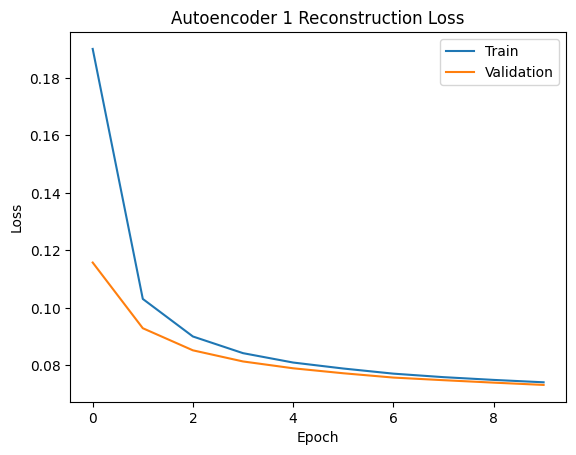

In [ ]:
# Plot the loss for the first autoencoder
plt.plot(history1.history['loss'], label='Train')
plt.plot(history1.history['val_loss'], label='Validation')
plt.title('Autoencoder 1 Reconstruction Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

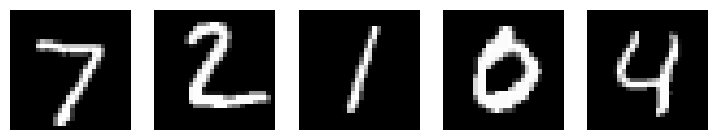

In [ ]:
n=5
plt.figure(figsize=(9,2))
for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.imshow(test_images[i].reshape(28,28),cmap="gray")
  ax.axis("off")

plt.show()

313/313 [==============================] - 1s 2ms/step


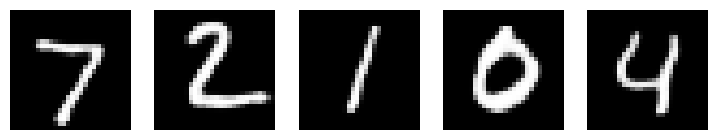

In [ ]:
reconstructed_images=autoencoder.predict(test_images)
n=5
plt.figure(figsize=(9,2))
for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.imshow(reconstructed_images[i].reshape(28,28),cmap="gray")
  ax.axis("off")

plt.show()

In [ ]:
# Define the encoder architecture for the second layer
encoded_1 = autoencoder_1.layers[2].output
encoded_2 = Dense(64, activation='relu')(encoded_1)

# Define the decoder architecture for the second layer
decoded_2 = Dense(128, activation='relu')(encoded_2)
decoded_2 = Dense(256, activation='relu')(decoded_2)
decoded_2 = Dense(input_dim, activation='sigmoid')(decoded_2)

# Create the autoencoder model for the second layer
autoencoder_2 = Model(input_layer, decoded_2)


In [ ]:
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

In [ ]:
autoencoder_2.compile(optimizer='adam', loss='binary_crossentropy')
epochs = 10
history1 = autoencoder_2.fit(train_images_flat, train_images_flat, epochs=epochs, batch_size=256, validation_data=(test_images_flat, test_images_flat))

Epoch 1/10
235/235 [==============================] - 3s 5ms/step - loss: 0.1804 - val_loss: 0.1167
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1053 - val_loss: 0.0966
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0948 - val_loss: 0.0907
Epoch 4/10
235/235 [==============================] - 2s 6ms/step - loss: 0.0904 - val_loss: 0.0880
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0878 - val_loss: 0.0861
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0859 - val_loss: 0.0842
Epoch 7/10
235/235 [==============================] - 2s 6ms/step - loss: 0.0844 - val_loss: 0.0832
Epoch 8/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0832 - val_loss: 0.0820
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0824 - val_loss: 0.0812
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0815 - val_loss: 0.0804

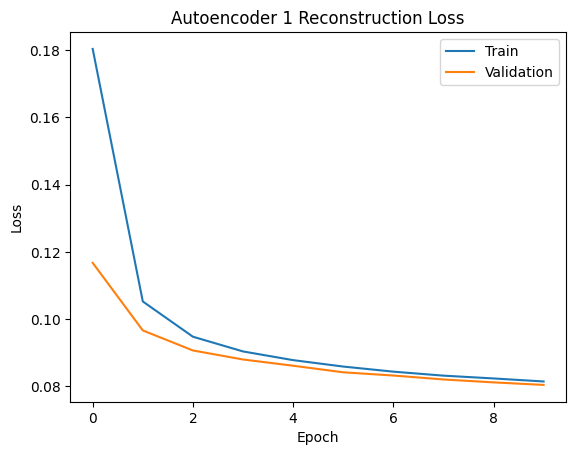

In [ ]:
# Plot the loss for the first autoencoder
plt.plot(history1.history['loss'], label='Train')
plt.plot(history1.history['val_loss'], label='Validation')
plt.title('Autoencoder 1 Reconstruction Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

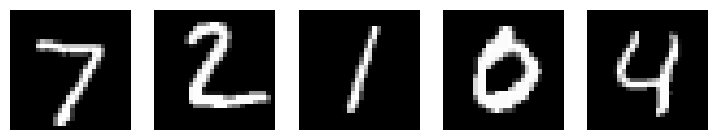

In [ ]:
n=5
plt.figure(figsize=(9,2))
for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.imshow(test_images[i].reshape(28,28),cmap="gray")
  ax.axis("off")

plt.show()

313/313 [==============================] - 1s 2ms/step


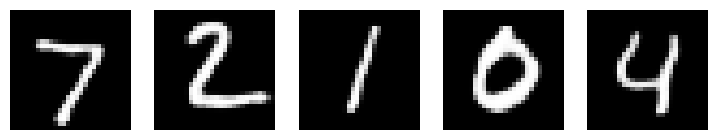

In [ ]:
reconstructed_images=autoencoder.predict(test_images)
n=5
plt.figure(figsize=(9,2))
for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.imshow(reconstructed_images[i].reshape(28,28),cmap="gray")
  ax.axis("off")

plt.show()